In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


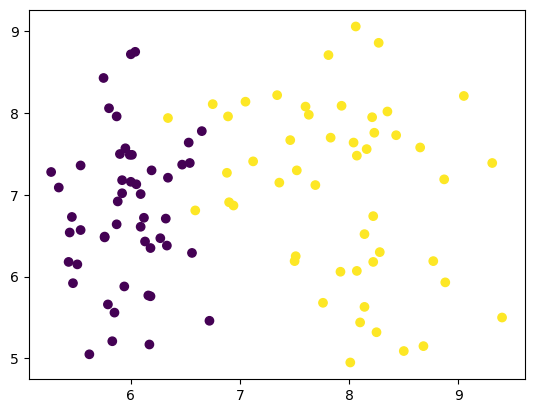

In [4]:
plt.scatter(df['cgpa'],df['resume_score'],c=df['placed'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Input

In [7]:
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.get_weights()

[array([[ 1.538204  , -0.2206627 , -0.16846398,  0.8145599 , -0.36881408,
         -0.01213056, -0.7402973 ,  0.46325418, -0.6416482 , -0.22792253],
        [ 0.42815334, -0.11906138, -1.1939079 , -0.9961977 , -0.6058856 ,
         -0.49370778, -0.5895133 ,  0.4076016 , -1.2974287 , -1.8096054 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.51336634,  0.6027243 ,  0.19712953, -0.06659773, -0.01458419,
          0.73576957, -1.0035515 , -0.03000849, -1.0136743 ,  0.18565689],
        [-0.1801833 , -0.22347544, -0.4267912 , -0.3832844 ,  0.32655418,
         -0.5441414 ,  0.77385026,  0.6587818 ,  0.42632717, -0.12025646],
        [ 0.42814523, -0.33340958, -0.15127654,  0.07102103, -0.59956235,
         -0.19519632,  0.12151836, -0.02607685, -0.40149254, -0.37588406],
        [-0.617775  ,  0.70787513,  0.7874245 ,  0.04725648, -0.45311776,
         -0.75570154, -0.32285205,  0.09690559,  0.97031397, -0.07462493],
        [-0.48309

In [9]:
initial_weights = model.get_weights()

In [10]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [11]:
model.set_weights(initial_weights)

In [12]:
model.get_weights()

[array([[-0.20678936,  0.5181379 ,  0.28040504,  0.52215326, -0.42069986,
          1.3831233 ,  1.8644094 , -0.10507236,  0.36115837, -0.04042959],
        [ 0.19105761, -0.3672938 , -0.9843127 , -0.83889645, -1.0517702 ,
          0.63367426, -1.3165882 ,  1.8105729 ,  0.33518234, -0.19387266]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.14090998,  0.20220421, -0.31596532,  0.04307981, -0.1532705 ,
         -0.20542914,  0.62629074, -0.21680722,  0.17670071,  0.41104096],
        [-0.10549262, -0.35772035, -0.10117944, -0.36459842, -0.3013483 ,
         -0.22269407, -0.26189604, -0.20167392, -0.28244424,  0.06953   ],
        [-0.04367189, -0.00729967, -0.3370037 , -0.12774666, -0.19142476,
         -0.19864468, -0.14692944,  0.10105979,  0.04136163,  0.1700669 ],
        [ 0.3250585 , -0.6804319 , -0.2348437 ,  0.49779463,  0.56598353,
         -0.7034715 ,  0.2669175 ,  0.23761955, -0.13380489,  0.10244393],
        [ 0.10219

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.4625 - loss: 0.7024 - val_accuracy: 0.5500 - val_loss: 0.6829
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4586 - loss: 0.6950 - val_accuracy: 0.5500 - val_loss: 0.6791
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4820 - loss: 0.6885 - val_accuracy: 0.5500 - val_loss: 0.6759
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4781 - loss: 0.6871 - val_accuracy: 0.5500 - val_loss: 0.6740
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4742 - loss: 0.6845 - val_accuracy: 0.5500 - val_loss: 0.6722
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4977 - loss: 0.6769 - val_accuracy: 0.5500 - val_loss: 0.6708
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5172 - loss: 0.6684 - val_accuracy: 0.5500 - val_loss: 0.6698
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4859 - loss: 0.6767 - val_accuracy: 0.5500 - val_loss

In [15]:
model.get_weights()

[array([[-0.23670536,  0.56884515,  0.28040504,  0.49804777, -0.42069986,
          1.4666028 ,  1.9276121 , -0.13884005,  0.34936333, -0.04042959],
        [ 0.1600248 , -0.38864073, -0.9843127 , -0.862997  , -1.0517702 ,
          0.728627  , -1.316632  ,  1.8334413 ,  0.3891985 , -0.19387266]],
       dtype=float32),
 array([-0.02971604, -0.17559546,  0.        , -0.02395493,  0.        ,
         0.19994912, -0.16259728,  0.12083293,  0.1977484 ,  0.        ],
       dtype=float32),
 array([[ 0.14090998,  0.22920343, -0.31596532,  0.04307981, -0.18099186,
         -0.17922324,  0.62629074, -0.21680722,  0.17670071,  0.41104096],
        [-0.10549262, -0.5139787 , -0.10117944, -0.36459842, -0.09999505,
         -0.3966915 , -0.26189604, -0.20699966, -0.30062747,  0.06953   ],
        [-0.04367189, -0.00729967, -0.3370037 , -0.12774666, -0.19142476,
         -0.19864468, -0.14692944,  0.10105979,  0.04136163,  0.1700669 ],
        [ 0.3250585 , -0.6804319 , -0.2348437 ,  0.49779463, 

In [17]:
(np.random.randn(10,10)*0.01).min()

-0.026105144325255552

In [18]:
(np.random.randn(10,10)*0.01).max()

0.02897586812644694